In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.DataFrame({
    'x':[12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'y':[39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})

In [3]:
df

,x,y
0,12,39
1,20,36
2,28,30
3,18,52
4,29,54
5,33,46
6,24,55
7,45,59
8,45,63
9,52,70


In [4]:
np.random.seed(200)
k = 3
# centroid[i] = [x,y]
centroids ={
    i+1 : [np.random.randint(0,80),np.random.randint(0,80)]
    for i in range(k)
}

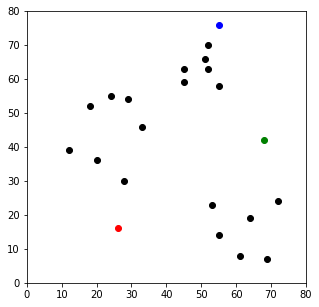

In [5]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color='k')
colmap = {1:'r',2:'g',3:'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])

plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

# Another method 

In [9]:
data  = pd.read_csv("E:/Data/Book1.csv")

In [11]:
data.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohal,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [12]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

Text(0,0.5,'Income')

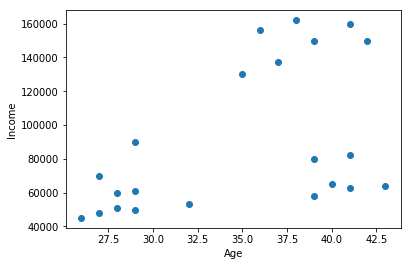

In [24]:
plt.scatter(data.Age,data['Income'])
plt.xlabel('Age')
plt.ylabel('Income')

In [26]:
km = KMeans(n_clusters=3)
y_pred= km.fit_predict(data[['Age','Income']])
y_pred

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [27]:
data['cluster']=y_pred
data.head()

,Name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohal,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [28]:
km.cluster_centers_

array([[3.82857143e+01, 1.49285714e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

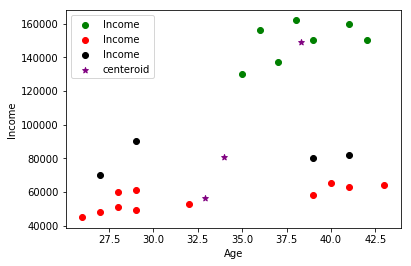

In [29]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centeroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

#Some Preprocession

In [58]:
scaler = MinMaxScaler()
scaler.fit(data[['Income']])
data['Income']= scaler.transform(data[['Income']])


scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])

In [59]:
data.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohal,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


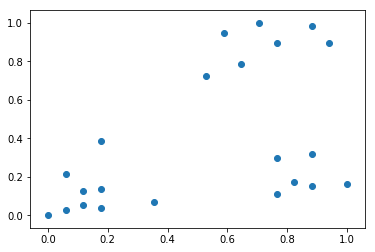

In [60]:
plt.scatter(data.Age,data['Income'])

In [61]:
km = KMeans(n_clusters=3)
y_pred= km.fit_predict(data[['Age','Income']])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [62]:
data['cluster']=y_pred

In [63]:
km.cluster_centers_

array([[0.72268908, 0.89133089],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

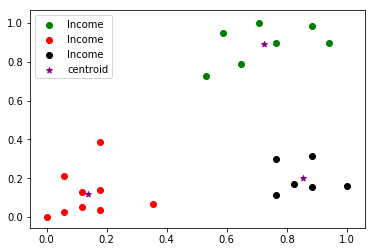

In [64]:
df1= data[data.cluster==0]
df2= data[data.cluster==1]
df3 =data[data.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

#Elbow Plot

In [68]:
sse = []
k_reg = range(1,10)
for k in k_reg:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age','Income']])
    sse.append(km.inertia_)

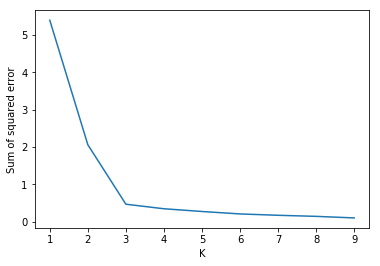

In [71]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_reg,sse)